In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf
import scipy.constants as sc

#
chirp scaling 原理
##
1. 常量偏移
 

TBP 19.140625 400.0


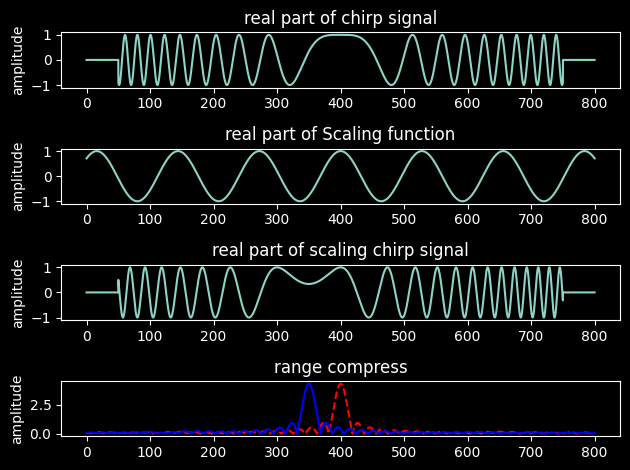

In [34]:
Kr = 100
Fr = 800
oversampling_rate = 9.15
ADC_sampling_frequency = Fr*oversampling_rate
duation = 1/Fr*800
T = 1/Fr*350            #signal duation
t_zerofre = 0           #zero frequency point
delta_tau = 50/Fr       #scaling index
interval_base = 1/ADC_sampling_frequency
t_range = np.arange(-duation/2,duation/2 ,interval_base)
x_range = np.linspace(0, 800 - 800/len(t_range), len(t_range))

x_chirp_original = (np.abs(t_range)<=T)*np.exp(1j*np.pi*Kr*((t_range-t_zerofre)**2))
Scaling_function = np.exp(1j*2*np.pi*Kr*((t_range-t_zerofre)*delta_tau))
x_chirp_scaling = x_chirp_original*Scaling_function

N_rg = len(x_chirp_original)

#range compress
Bw = abs(Kr)*T
f_rg = np.fft.fftshift(np.linspace(-ADC_sampling_frequency/2, ADC_sampling_frequency/2 - ADC_sampling_frequency/N_rg,N_rg))
f_rg -= np.round((f_rg - 0) / ADC_sampling_frequency) * ADC_sampling_frequency
window = ss.get_window(window=('kaiser',0),Nx=N_rg)  # 时域窗
Window = np.fft.fftshift(window)  # 频域窗
Hrf = (np.abs(f_rg) <= Bw/2) * Window * np.exp(1j * np.pi * f_rg**2 / Kr)


x_com_original = sf.ifft(sf.fft(x_chirp_original)*Hrf)
x_com_scaling = sf.ifft(sf.fft(x_chirp_scaling)*Hrf)


plt.figure()
plt.subplot(4,1,1)
plt.plot(x_range, np.real(x_chirp_original))
plt.ylabel('amplitude')
plt.title('real part of chirp signal')
 
plt.subplot(4,1,2)
plt.plot(x_range, np.real(Scaling_function))
plt.ylabel('amplitude')
plt.title('real part of Scaling function')

plt.subplot(4,1,3)
plt.plot(x_range, np.real(x_chirp_scaling))
plt.ylabel('amplitude')
plt.title('real part of scaling chirp signal')

plt.subplot(4,1,4)
plt.plot(x_range, np.abs(x_com_original),'r--')
plt.plot(x_range, np.abs(x_com_scaling),'b')
plt.ylabel('amplitude')
plt.title('range compress')

plt.tight_layout()
print('TBP',Kr*T**2, np.argmax(np.abs(x_com_original))/oversampling_rate) #POSP TBP

##
2. 随距离线性偏移

TBP 19.53125 255.84699453551912
[-0.32       -0.31986339 -0.31972678 ...  0.31961749  0.3197541
  0.31989071]


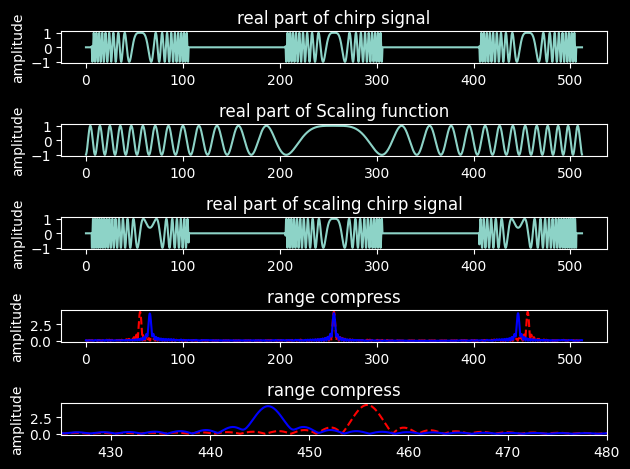

In [33]:
Kr = 5000
Fr = 800
oversampling_rate = 9.15
ADC_sampling_frequency = Fr*oversampling_rate
duation = 1/Fr*512
T = 1/Fr*50            #signal duation
t_zerofre = [-200/Fr,0,200/Fr]           #zero frequency point
interval_base = 1/ADC_sampling_frequency
t_range = np.arange(-duation/2,duation/2 ,interval_base)
x_range = np.linspace(0, 512 - 512/len(t_range), len(t_range))


x_chirp_original = (np.abs(t_range-t_zerofre[0])<=T)*np.exp(1j*np.pi*Kr*((t_range-t_zerofre[0])**2)) + \
                    (np.abs(t_range-t_zerofre[1])<=T)*np.exp(1j*np.pi*Kr*((t_range-t_zerofre[1])**2)) + \
                    (np.abs(t_range-t_zerofre[2])<=T)*np.exp(1j*np.pi*Kr*((t_range-t_zerofre[2])**2))

Alpha = 1/19
Scaling_function_Linear = np.exp(1j*np.pi*Alpha*Kr*t_range**2)
x_chirp_scaling = x_chirp_original*Scaling_function_Linear

N_rg = len(x_chirp_original)
#range compress
Bw = abs(Kr)*T
f_rg = np.fft.fftshift(np.linspace(-ADC_sampling_frequency/2, ADC_sampling_frequency/2 - ADC_sampling_frequency/N_rg,N_rg))
f_rg -= np.round((f_rg - 0) / ADC_sampling_frequency) * ADC_sampling_frequency
window = ss.get_window(window=('kaiser',0),Nx=N_rg)  # 时域窗
Window = np.fft.fftshift(window)  # 频域窗
Hrf = (np.abs(f_rg) <= Bw/2) * Window * np.exp(1j * np.pi * f_rg**2 / Kr)


x_com_original = sf.ifft(sf.fft(x_chirp_original)*Hrf)
x_com_scaling = sf.ifft(sf.fft(x_chirp_scaling)*Hrf)
plt.figure()
plt.subplot(5,1,1)
plt.plot(x_range, np.real(x_chirp_original))
plt.ylabel('amplitude')
plt.title('real part of chirp signal')

plt.subplot(5,1,2)
plt.plot(x_range, np.real(Scaling_function_Linear))
plt.ylabel('amplitude')
plt.title('real part of Scaling function')

plt.subplot(5,1,3)
plt.plot(x_range, np.real(x_chirp_scaling))
plt.ylabel('amplitude')
plt.title('real part of scaling chirp signal')

plt.subplot(5,1,4)
plt.plot(x_range, np.abs(x_com_original),'r--')
plt.plot(x_range, np.abs(x_com_scaling),'b')
plt.ylabel('amplitude')
plt.title('range compress')

plt.subplot(5,1,5)
plt.plot(x_range, np.abs(x_com_original),'r--')
plt.plot(x_range, np.abs(x_com_scaling),'b')
plt.xlim(425,480)
plt.ylabel('amplitude')
plt.title('range compress')

plt.tight_layout()
print('TBP',Kr*T**2, np.argmax(np.abs(x_com_original))/oversampling_rate) #POSP TBP
print(t_range)